## MULTIPLE LOGISTIC REGRESSION

Del dataset churn, ajusta un modelo de estado de abandono con las dos variables explicativas del conjunto de datos: la duración de la relación con el cliente y la antigüedad de la compra, y su interacción.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

churn_df = pd.read_csv('churn.csv')

model = logit('has_churned ~ time_since_first_purchase + time_since_last_purchase', data=churn_df).fit()

Optimization terminated successfully.
         Current function value: 0.651175
         Iterations 5


Para todas las combinaciones posibles de tiempo de relación con el cliente de -2 a 4 aumentando en tramos de 0.1 y antigüedad de compra de -1 a 6, en tramos de 0.1, predice si se darán de baja o no. (La predicción debe ser o 0 o 1)

In [60]:
tsfp_predict = pd.DataFrame({'time_since_first_purchase': np.arange(-2, 4, 0.1)})
tslp_predict = pd.DataFrame({'time_since_last_purchase': np.arange(-1, 6, 0.1)})

tslp_predict['time_since_first_purchase'] = 0
tsfp_predict['time_since_last_purchase'] = 0

tsfp_predict['has_churned'] = model.predict(tsfp_predict)
tslp_predict['has_churned'] = model.predict(tslp_predict)

tsfp_predict['has_churned'] = tsfp_predict['has_churned'].apply(lambda x: 1 if x > 0.5 else 0)
tslp_predict['has_churned'] = tslp_predict['has_churned'].apply(lambda x: 1 if x > 0.5 else 0)

Muestra en un mismo gràfico los valores reales y nuestras perdicciones (el gráfico se ve que flipas). Responde la siguiente pregunta a ojo:
- Un usuario con antigüedad valor 3, cuanto debe hacer que no compra para que considere que se va a dar de baja?

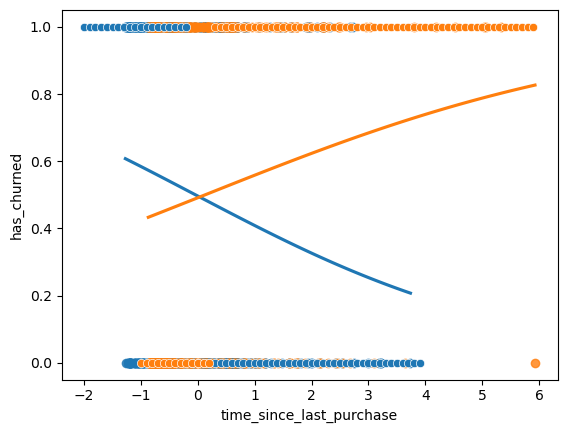

In [61]:
#Muestra en un mismo gràfico los valores reales y nuestras perdicciones (el gráfico se ve que flipas). Responde la siguiente pregunta a ojo:
#- Un usuario con antigüedad valor 3, cuanto debe hacer que no compra para que considere que se va a dar de baja?
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn_df, logistic=True, ci=None)
sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn_df, logistic=True, ci=None)
sns.scatterplot(x='time_since_first_purchase', y='has_churned', data=tsfp_predict)
sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=tslp_predict)
plt.show()


A través de la matriz de confusión, obtén la accuracy del modelo. ¿Te parece bueno? No

In [62]:
respuesta_real = churn_df['has_churned']
prediccion_completa = np.round(model.predict(churn_df))
modComp = pd.DataFrame({'respuesta_real': respuesta_real, 'prediccion_completa': prediccion_completa})
conf_matrix = model.pred_table()
VP = conf_matrix[0,0]
VN = conf_matrix[0,1]
FN = conf_matrix[1,0]
FP = conf_matrix[1,1]
precision = (VP+FP)/(VP+VN+FN+FP)
print(precision)

0.62


## Sampling en python

Del DataSet Attrition, muestra la media de desgaste (attrition) para cada grupo de Sataisfacción en sus relaciones.
Posteriormente haz lo mismo para una muestra de 10,luego para una de 1000 y finalmente para el 25% (usa el parametro frac).
Saca tus conclusiones y escribe:

In [63]:
'''
Del DataSet Attrition.feather
El dataset tiene las siguientes columnas: 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
'''
attrion_df = pd.read_feather('Attrition.feather')
print(attrion_df.groupby('RelationshipSatisfaction')['Attrition'].mean())
print(attrion_df.groupby('RelationshipSatisfaction')['Attrition'].sample(10).mean())
print(attrion_df.groupby('RelationshipSatisfaction')['Attrition'].sample(100).mean())
print(attrion_df.groupby('RelationshipSatisfaction')['Attrition'].sample(frac=0.25).mean())

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64
0.15
0.185
0.19293478260869565


Queremos que siga la misma proporcion que el dataset original, así que obtén el 25% de muestras de cada grupo. Muestra los valores que se pedian antes y saca tus conlusiones:

In [64]:
low = attrion_df[attrion_df['RelationshipSatisfaction'] == 'Low']
medium = attrion_df[attrion_df['RelationshipSatisfaction'] == 'Medium']
high = attrion_df[attrion_df['RelationshipSatisfaction'] == 'High']
very_high = attrion_df[attrion_df['RelationshipSatisfaction'] == 'Very_High']

low_sample = low.sample(frac=0.25)
medium_sample = medium.sample(frac=0.25)
high_sample = high.sample(frac=0.25)
very_high_sample = very_high.sample(frac=0.25)

print(low_sample['Attrition'].mean())
print(medium_sample['Attrition'].mean())
print(high_sample['Attrition'].mean())
print(very_high_sample['Attrition'].mean())

0.21739130434782608
0.09210526315789473
0.12173913043478261
0.1574074074074074


Obtén el mismo número de muestras de cada grupo 50. Muestra los valores y reflexiona para cuando podría ser útil este tipo de muestreo:

In [65]:
low_sample = low.sample(50)
medium_sample = medium.sample(50)
high_sample = high.sample(50)
very_high_sample = very_high.sample(50)

print(low_sample['Attrition'].mean())
print(medium_sample['Attrition'].mean())
print(high_sample['Attrition'].mean())
print(very_high_sample['Attrition'].mean())

0.2
0.12
0.1
0.12
